In [1]:
import os

import numpy as np
from scipy import stats
from scipy import signal 
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt
import IPython.display as ipd

# Task 1

	Вам дан массив сигналов s_(1..100) (t) (signals.npy) длительностью 1024 отсчета, а т
    акже массив смеси чистого сигнала и шума (mixtures.npy) y_(1...1000) (t)=s_n (t)+n_(1...1000) (t) 
    длительностью 10.000 отсчетов, для каждой смеси “сигнал + шум” определить 
    какой из 100 предложенных сигналов присутствует в смеси, его смещение, а также отношение сигнал шум в dB.

In [2]:
signals = np.load('./signals.npy')
mixtures = np.load('./mixtures.npy')

In [3]:
print(f'{signals.shape=} {mixtures.shape=}')

signals.shape=(100, 1024) mixtures.shape=(1000, 10000)


In [4]:
sr = 44100  # sample rate
ipd.Audio(signals[0], rate=sr)

In [5]:
sr = 44100  # sample rate
ipd.Audio(mixtures[0], rate=sr)

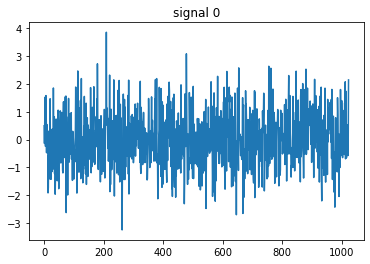

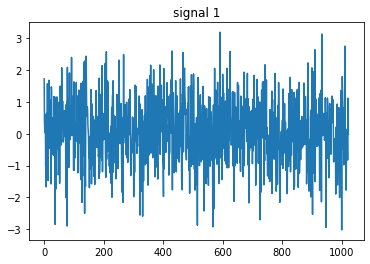

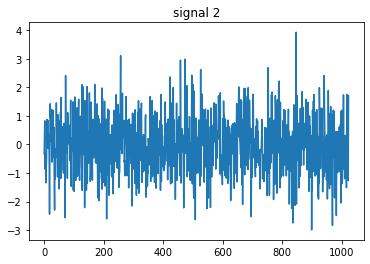

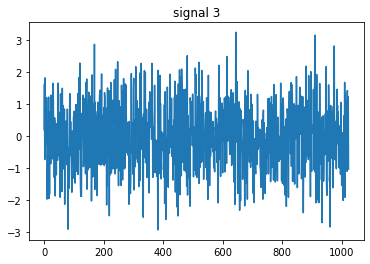

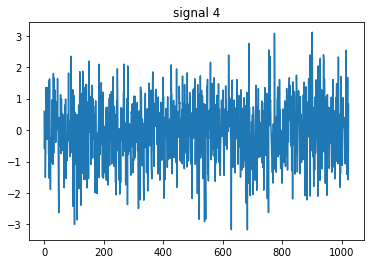

In [6]:
for index in range(5):
    plt.title(f'signal {index}')
    plt.plot(signals[index])
    plt.show()

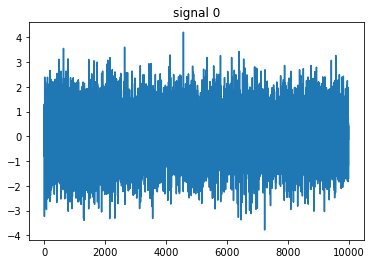

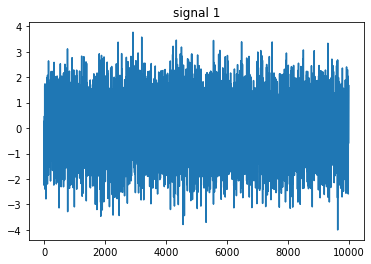

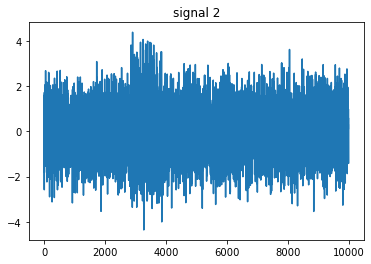

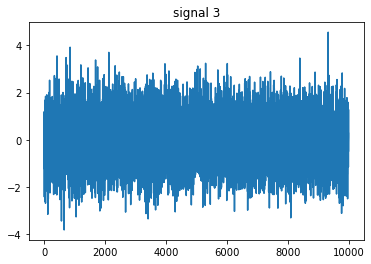

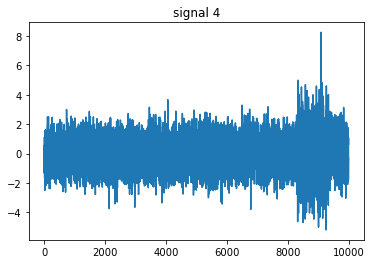

In [7]:
for index in range(5):
    plt.title(f'signal {index}')
    plt.plot(mixtures[index])
    plt.show()

In [8]:
def signaltonoise_dB(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return 10.0 * np.log10(abs(np.where(sd == 0, 0, m/sd))) 

In [ ]:
res = []

for j in tqdm(range(1000)):
    for i in range(100):
        corr = signal.correlate(signals[i], mixtures[j], mode = 'full')
        if max(corr) > 800:
            res.append({
                'mixture_id':j,
                'signal_id':i,
                'bias': np.argmax(corr),
                'SNR': signaltonoise_dB(mixtures[j])
            })

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
res[0]

In [ ]:
n = 0
s = signals[res[n]['signal_id']]
m = mixtures[res[n]['mixture_id']]

corr = signal.correlate(s, m, mode='full')
idx = np.argmax(corr)

plt.plot(corr)
plt.show()

plt.plot(s)
plt.show()

presig = np.zeros(np.argmax(corr))
postsig = np.zeros(10000-(np.argmax(corr)+len(s)))
sig2 = np.concatenate([presig, s, postsig])

plt.figure()
plt.plot(m, "r")
plt.plot(sig2, "b")
plt.show()

# Task 2

	Вам дан массив из 1024 случайных сигналов (arrays.npy), для каждого сигнала определить к какому случайному распределению он относится. Всего может быть 4 возможных варианта распределения:
        Нормальное распределение с нулевым ожиданием и единичной дисперсией 
        Экспоненциальное распределение с λ=1
        Хи-квадрат распределение k=1
        Гамма распределение θ=2,k=3
    Ваша задача определить тип распределения для каждого сигнала в массиве


In [ ]:
arrays = np.load('./arrays.npy')
arrays.shape

In [ ]:

def get_best_distribution(data):
    dist_names = ['norm', 'expon', 'chi2', 'gamma']
    dist_results = []
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        param = dist.fit(data)

        D, p = stats.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))

    best_dist, _ = (max(dist_results, key=lambda item: item[1]))
    return best_dist

In [ ]:
distribution_names = []

for distribution in tqdm(arrays):
    distribution_name = get_best_distribution(distribution)
    distribution_names.append(distribution_name)

In [ ]:
distribution_names[:10]